# Assignment 10 - Group 7
## Part A

First we input necessary package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='once')
import datetime
from datetime import timedelta

Then read each file with pandas, use the first column as index.

In [2]:
airlines = pd.read_csv('airlines.csv', index_col=0)
airports = pd.read_csv('airports.csv', index_col=0)
flights = pd.read_csv('flights.csv', index_col=0)
planes = pd.read_csv('planes.csv', index_col=0)
weather = pd.read_csv('weather.csv', index_col=0)

### i. Print the row number of each dataframe

In [3]:
print(len(airlines))
print(len(airports))
print(len(flights))
print(len(planes))
print(len(weather))

16
1458
336776
3322
26130


### ii. Select delayed flights, and plot them with histogram.

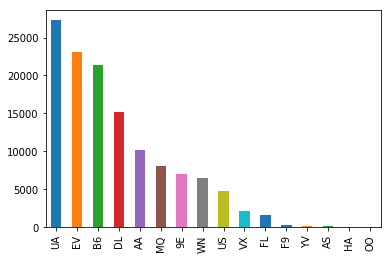

In [4]:
# Plot the total frequency of delayed flights. 

mydf = flights[flights['dep_delay']>0]
x = mydf.carrier.value_counts()

x.plot(kind='bar')

In [5]:
A = mydf['dep_delay'][mydf['carrier'] == '9E']
B = mydf['dep_delay'][mydf['carrier'] == 'AA']
C = mydf['dep_delay'][mydf['carrier'] == 'AS']
D = mydf['dep_delay'][mydf['carrier'] == 'B6']
E = mydf['dep_delay'][mydf['carrier'] == 'DL']
F = mydf['dep_delay'][mydf['carrier'] == 'EV']
G = mydf['dep_delay'][mydf['carrier'] == 'F9']
H = mydf['dep_delay'][mydf['carrier'] == 'FL']
I = mydf['dep_delay'][mydf['carrier'] == 'HA']
J = mydf['dep_delay'][mydf['carrier'] == 'MQ']
K = mydf['dep_delay'][mydf['carrier'] == 'OO']
L = mydf['dep_delay'][mydf['carrier'] == 'UA']
M = mydf['dep_delay'][mydf['carrier'] == 'US']
N = mydf['dep_delay'][mydf['carrier'] == 'VX']
O = mydf['dep_delay'][mydf['carrier'] == 'WN']
P = mydf['dep_delay'][mydf['carrier'] == 'YV']

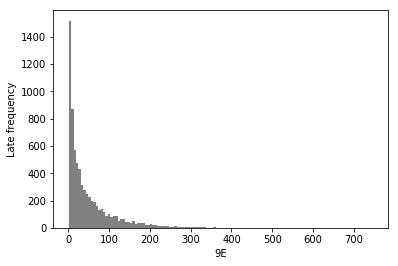

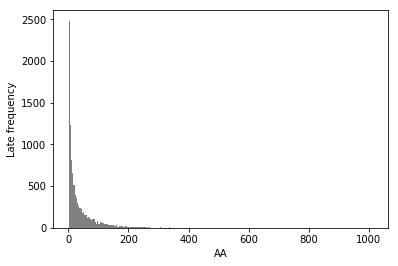

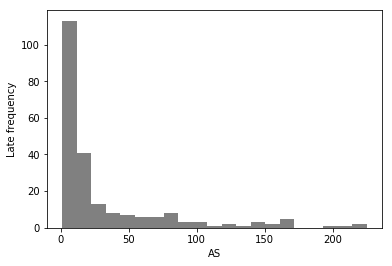

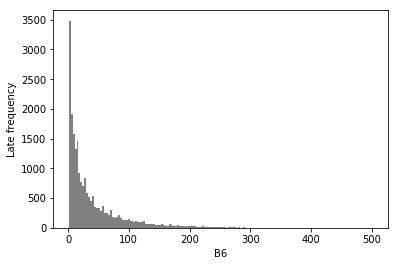

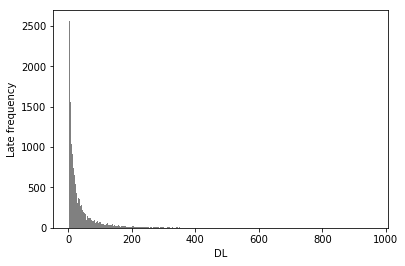

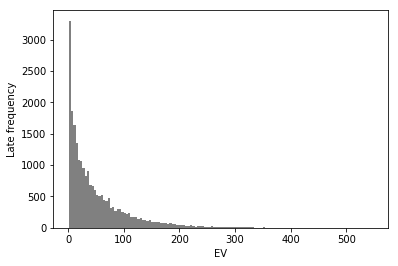

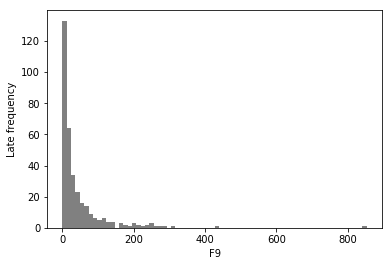

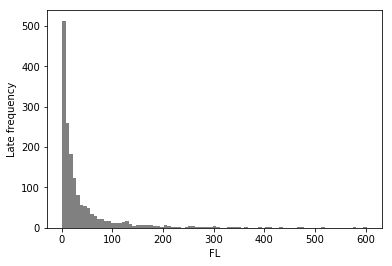

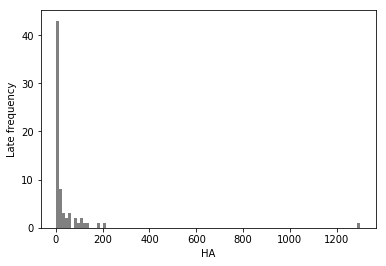

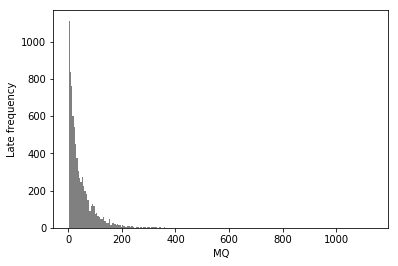

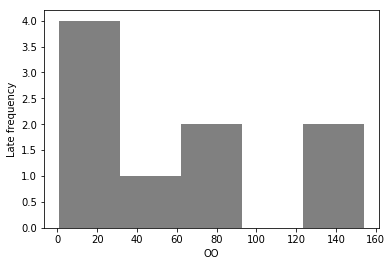

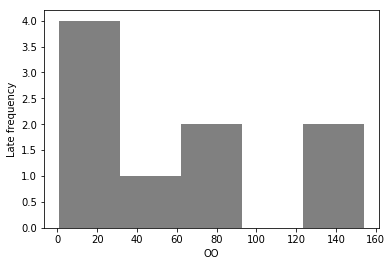

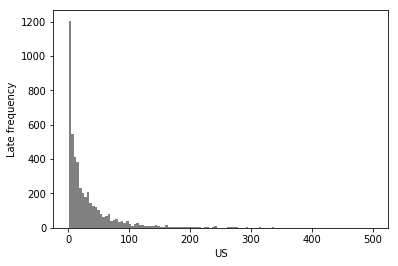

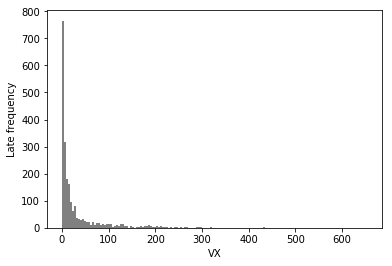

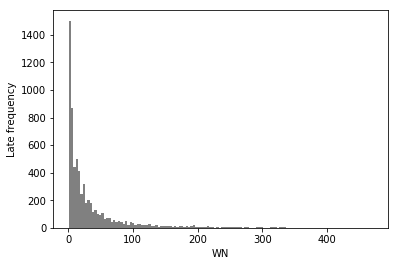

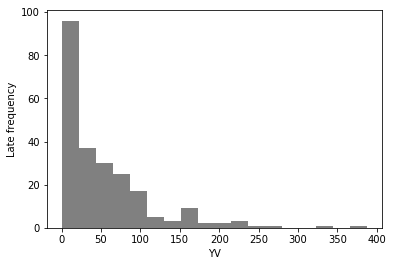

In [7]:
plt.hist(A, bins='auto', histtype='bar', color='grey')
plt.xlabel('9E')
plt.ylabel('Late frequency')
plt.show()
plt.hist(B, bins='auto', histtype='bar', color='grey')
plt.xlabel('AA')
plt.ylabel('Late frequency')
plt.show()
plt.hist(C, bins='auto', histtype='bar', color='grey')
plt.xlabel('AS')
plt.ylabel('Late frequency')
plt.show()
plt.hist(D, bins='auto', histtype='bar', color='grey')
plt.xlabel('B6')
plt.ylabel('Late frequency')
plt.show()
plt.hist(E, bins='auto', histtype='bar', color='grey')
plt.xlabel('DL')
plt.ylabel('Late frequency')
plt.show()
plt.hist(F, bins='auto', histtype='bar', color='grey')
plt.xlabel('EV')
plt.ylabel('Late frequency')
plt.show()
plt.hist(G, bins='auto', histtype='bar', color='grey')
plt.xlabel('F9')
plt.ylabel('Late frequency')
plt.show()
plt.hist(H, bins='auto', histtype='bar', color='grey')
plt.xlabel('FL')
plt.ylabel('Late frequency')
plt.show()
plt.hist(I, bins='auto', histtype='bar', color='grey')
plt.xlabel('HA')
plt.ylabel('Late frequency')
plt.show()
plt.hist(J, bins='auto', histtype='bar', color='grey')
plt.xlabel('MQ')
plt.ylabel('Late frequency')
plt.show()
plt.hist(K, bins='auto', histtype='bar', color='grey')
plt.xlabel('OO')
plt.ylabel('Late frequency')
plt.show()
plt.hist(K, bins='auto', histtype='bar', color='grey')
plt.xlabel('OO')
plt.ylabel('Late frequency')
plt.show()
plt.hist(M, bins='auto', histtype='bar', color='grey')
plt.xlabel('US')
plt.ylabel('Late frequency')
plt.show()
plt.hist(N, bins='auto', histtype='bar', color='grey')
plt.xlabel('VX')
plt.ylabel('Late frequency')
plt.show()
plt.hist(O, bins='auto', histtype='bar', color='grey')
plt.xlabel('WN')
plt.ylabel('Late frequency')
plt.show()
plt.hist(P, bins='auto', histtype='bar', color='grey')
plt.xlabel('YV')
plt.ylabel('Late frequency')
plt.show()

In [8]:
from ggplot import *
ggplot(aes(x='carrier'), data=mydf) +  geom_bar()

ModuleNotFoundError: No module named 'ggplot'

According to the plot, the best in terms of on-time departure was carrier 'OO', which name is 'SkyWest Airlines Inc.'

### iii. Create a dataframe containing the means and standard deviations of inter-arrivial times for the top 10 busiest airports.
We only need to focus on column 'year', 'month', 'day', 'arr_time' and 'dest', therefore we sliced these columns from the dataframe.

In [9]:
flights = flights[['year', 'month', 'day', 'arr_time', 'dest']]
flights.head()

,year,month,day,arr_time,dest
1,2013,1,1,830.0,IAH
2,2013,1,1,850.0,IAH
3,2013,1,1,923.0,MIA
4,2013,1,1,1004.0,BQN
5,2013,1,1,812.0,ATL


Delete the rows contains null value or blank space, check the result

In [10]:
flights.isnull().sum()

year           0
month          0
day            0
arr_time    8713
dest           0
dtype: int64

In [11]:
flights.dropna(axis=0, how='any', inplace=True)
flights.isnull().sum()

year        0
month       0
day         0
arr_time    0
dest        0
dtype: int64

Then in order to get the inter-arrival time, firstly we need to combine date into one column and change the data type to datetime,so does the arrival time.

In [12]:
flights.arr_time = flights.arr_time.astype(int)
flights.head()

,year,month,day,arr_time,dest
1,2013,1,1,830,IAH
2,2013,1,1,850,IAH
3,2013,1,1,923,MIA
4,2013,1,1,1004,BQN
5,2013,1,1,812,ATL


In [13]:
flights = flights.astype(str)
flights.head()

,year,month,day,arr_time,dest
1,2013,1,1,830,IAH
2,2013,1,1,850,IAH
3,2013,1,1,923,MIA
4,2013,1,1,1004,BQN
5,2013,1,1,812,ATL


In [14]:
flights['arr_time'] = flights['arr_time'].str.rjust(4, fillchar="0")
flights.head()

,year,month,day,arr_time,dest
1,2013,1,1,0830,IAH
2,2013,1,1,0850,IAH
3,2013,1,1,0923,MIA
4,2013,1,1,1004,BQN
5,2013,1,1,0812,ATL


#### Now ensure that month is of two characters length, pad with 0, if needed

In [15]:
flights['month'] = flights['month'].str.rjust(2, fillchar="0")
flights['day'] = flights['day'].str.rjust(2, fillchar="0")
flights.head()

,year,month,day,arr_time,dest
1,2013,01,01,0830,IAH
2,2013,01,01,0850,IAH
3,2013,01,01,0923,MIA
4,2013,01,01,1004,BQN
5,2013,01,01,0812,ATL


In [16]:
flights['date'] = flights['year'].str.cat(flights['month'], sep = '-') 
flights['date'] = flights['date'].str.cat(flights['day'], sep = '-') 
flights.head()

,year,month,day,arr_time,dest,date
1,2013,01,01,0830,IAH,2013-01-01
2,2013,01,01,0850,IAH,2013-01-01
3,2013,01,01,0923,MIA,2013-01-01
4,2013,01,01,1004,BQN,2013-01-01
5,2013,01,01,0812,ATL,2013-01-01


In [17]:
flights['hour'] = flights['arr_time'].str[:2]
flights['minutes'] = flights['arr_time'].str[2:]
flights['time'] = flights['hour'].str.cat(flights['minutes'], sep=':')
flights.head()

,year,month,day,arr_time,dest,date,hour,minutes,time
1,2013,01,01,0830,IAH,2013-01-01,08,30,08:30
2,2013,01,01,0850,IAH,2013-01-01,08,50,08:50
3,2013,01,01,0923,MIA,2013-01-01,09,23,09:23
4,2013,01,01,1004,BQN,2013-01-01,10,04,10:04
5,2013,01,01,0812,ATL,2013-01-01,08,12,08:12


Then counts each airports' total arrived flights, grouped by year, month and day to see how many days are included in this dataset, devided to get the top 10 busiest airports. 

In [18]:
flights['arrive'] = flights['date'].str.cat(flights['time'], sep=' ')
flights['arrive'] = pd.to_datetime(flights['arrive'], format ='%Y-%m-%d %H:%M', errors='coerce')
flights.head()

,year,month,day,arr_time,dest,date,hour,minutes,time,arrive
1,2013,01,01,0830,IAH,2013-01-01,08,30,08:30,2013-01-01 08:30:00
2,2013,01,01,0850,IAH,2013-01-01,08,50,08:50,2013-01-01 08:50:00
3,2013,01,01,0923,MIA,2013-01-01,09,23,09:23,2013-01-01 09:23:00
4,2013,01,01,1004,BQN,2013-01-01,10,04,10:04,2013-01-01 10:04:00
5,2013,01,01,0812,ATL,2013-01-01,08,12,08:12,2013-01-01 08:12:00


Drop the rows which contains null value

In [19]:
flights.isnull().sum()

year          0
month         0
day           0
arr_time      0
dest          0
date          0
hour          0
minutes       0
time          0
arrive      150
dtype: int64

In [20]:
flights.dropna(axis=0, how='any', inplace=True)
flights.isnull().sum()

year        0
month       0
day         0
arr_time    0
dest        0
date        0
hour        0
minutes     0
time        0
arrive      0
dtype: int64

Count the average number of flights of each airports and sort top 10.

In [21]:
grouped = flights['dest'].value_counts()

In [22]:
days = flights.groupby(['year', 'month', 'day']).size()

In [23]:
avg = grouped/days.count()
avg.head(10)

ATL    46.221918
ORD    45.498630
LAX    43.964384
BOS    41.150685
MCO    38.282192
CLT    37.482192
SFO    36.172603
FLL    32.660274
MIA    31.849315
DCA    24.997260
Name: dest, dtype: float64

Then build dataframes for each airports

In [24]:
ATL = flights[flights['dest'] == 'ATL']   
ORD = flights[flights['dest'] == 'ORD']
LAX = flights[flights['dest'] == 'LAX']
BOS = flights[flights['dest'] == 'BOS']
MCO = flights[flights['dest'] == 'MCO']
CLT = flights[flights['dest'] == 'CLT']
SFO = flights[flights['dest'] == 'SFO']
FLL = flights[flights['dest'] == 'FLL']
MIA = flights[flights['dest'] == 'MIA']
DCA = flights[flights['dest'] == 'DCA']


Sort arrival time and get the difference bwtween each arrival time, transfer it to minutes, get the describe statistics

In [25]:
a =[ATL, ORD, LAX, BOS, MCO,CLT, SFO, FLL, MIA, DCA]
def iat(x):
    for i in x:
        c = pd.Series([])
        j = i.sort_values(by=['arrive'])
        j['iat'] = j['arrive'].diff()
        j['iat_min'] = j['iat'].dt.total_seconds()/60
        print(j.describe())      
iat(a)

                          iat       iat_min
count                   16870  16870.000000
mean   0 days 00:31:07.102548     31.118376
std    0 days 01:14:48.856903     74.814282
min           0 days 00:00:00      0.000000
25%           0 days 00:07:00      7.000000
50%           0 days 00:16:00     16.000000
75%           0 days 00:30:00     30.000000
max           0 days 21:56:00   1316.000000
                          iat       iat_min
count                   16606  16606.000000
mean   0 days 00:31:37.266048     31.621101
std    0 days 01:14:01.643826     74.027397
min           0 days 00:00:00      0.000000
25%           0 days 00:07:00      7.000000
50%           0 days 00:16:00     16.000000
75%           0 days 00:30:00     30.000000
max           0 days 20:06:00   1206.000000
                          iat       iat_min
count                   16046  16046.000000
mean   0 days 00:32:45.218746     32.753646
std    0 days 01:10:49.087066     70.818118
min           0 days 00:00:00   

Now build a dataframe to hold what we get

In [29]:
average = ['46.22', '45.50', '43.96', '41.15', '38.28', '37.48', '36.17', '32.66', '31.85', '25.00']
mean = ['31.12', '31.62', '32.75', '34.96', '37.61', '38.37', '39.81', ' 44.10', '45.21', '57.60']
sd = ['74.81', '74.03', '70.82', '67.60', '74.40', '70.51', '87.49', '77.27', '91.85', '98.46']
faa = ['ATL', 'ORD', 'LAX', 'BOS', 'MCO', 'CLT', 'SFO', 'FLL', 'MIA', 'DCA']
dic ={'faa' : faa, 'average' : average, 'mean' : mean, 'sd' : sd }
df = pd.DataFrame(dic)
df = pd.merge(df, airports, how='left', on=['faa'])
df = df[['faa', 'name', 'average', 'mean', 'sd']]
df

,faa,name,average,mean,sd
0,ATL,Hartsfield Jackson Atlanta Intl,46.22,31.12,74.81
1,ORD,Chicago Ohare Intl,45.50,31.62,74.03
2,LAX,Los Angeles Intl,43.96,32.75,70.82
3,BOS,General Edward Lawrence Logan Intl,41.15,34.96,67.60
4,MCO,Orlando Intl,38.28,37.61,74.40
5,CLT,Charlotte Douglas Intl,37.48,38.37,70.51
6,SFO,San Francisco Intl,36.17,39.81,87.49
7,FLL,Fort Lauderdale Hollywood Intl,32.66,44.10,77.27
8,MIA,Miami Intl,31.85,45.21,91.85
9,DCA,Ronald Reagan Washington Natl,25.00,57.60,98.46


### iv. Provide the histogram and density plot of the inter-arrival times for the top five busiest airports.

In [30]:
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

# Top 5: 'ATL', 'ORD', 'LAX', 'BOS', 'MCO'

In [31]:
# ATL summary: 
ATL.head()
iatATL = ATL.sort_values(by=['arrive'])
iatATL['iat'] = iatATL['arrive'].diff()
iatATL['iat_min'] =  iatATL['iat'].dt.total_seconds()/60

iatATL.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
iat,16870,0 days 00:31:07.102548,0 days 01:14:48.856903,0 days 00:00:00,0 days 00:07:00,0 days 00:16:00,0 days 00:30:00,0 days 21:56:00
iat_min,16870,31.1184,74.8143,0,7,16,30,1316


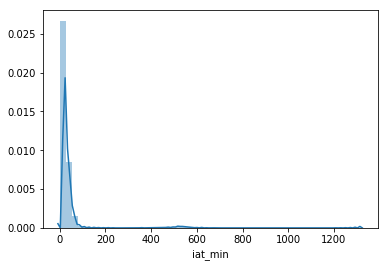

In [32]:
# Plot ATL:
warnings.filterwarnings('ignore')
iatATL = iatATL.dropna()
sns.distplot(iatATL['iat_min']);

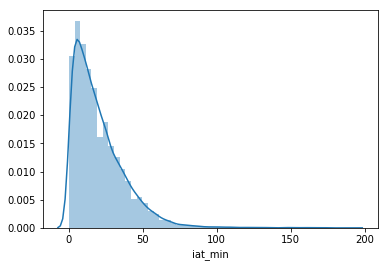

In [33]:
#ATL with less extreme data:

warnings.filterwarnings('ignore')
iatATLreduced = iatATL[iatATL['iat_min'] <= 200]
sns.distplot(iatATLreduced['iat_min'])

In [34]:
#ORD summary:
ORD.head()
iatORD = ORD.sort_values(by=['arrive'])
iatORD['iat'] = iatORD['arrive'].diff()
iatORD['iat_min'] =  iatORD['iat'].dt.total_seconds()/60

iatORD.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,16606,0 days 00:31:37.266048,0 days 01:14:01.643826,0 days 00:00:00,0 days 00:07:00,0 days 00:16:00,0 days 00:30:00,0 days 20:06:00
iat_min,16606,31.6211,74.0274,0,7,16,30,1206


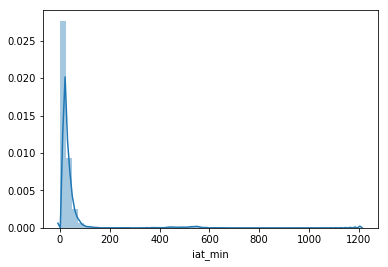

In [35]:
# Plot ORD:
warnings.filterwarnings('ignore')
iatORD = iatORD.dropna()
sns.distplot(iatORD['iat_min']);

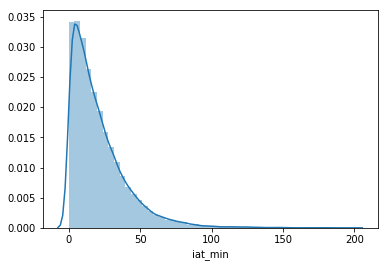

In [36]:
# ORD with less extreme values: 
warnings.filterwarnings('ignore')
iatORDreduced = iatORD[iatORD['iat_min'] <= 200]
sns.distplot(iatORDreduced['iat_min'])

In [37]:
# LAX summary:
ORD.head()
iatLAX = LAX.sort_values(by=['arrive'])
iatLAX['iat'] = iatLAX['arrive'].diff()
iatLAX['iat_min'] =  iatLAX['iat'].dt.total_seconds()/60

iatLAX.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,16046,0 days 00:32:45.218746,0 days 01:10:49.087066,0 days 00:00:00,0 days 00:07:00,0 days 00:17:00,0 days 00:34:00,0 days 11:37:00
iat_min,16046,32.7536,70.8181,0,7,17,34,697


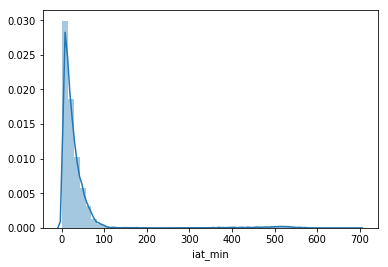

In [38]:
# Plot LAX:
warnings.filterwarnings('ignore')
iatLAX = iatLAX.dropna()
sns.distplot(iatLAX['iat_min']);

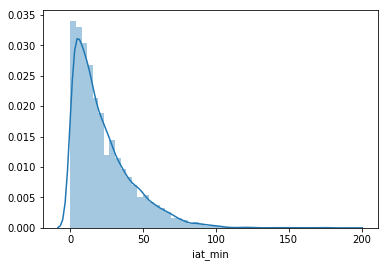

In [39]:
# iLAX with less extreme values: 
warnings.filterwarnings('ignore')
iatLAXreduced = iatLAX[iatLAX['iat_min'] <= 200]
sns.distplot(iatLAXreduced['iat_min'])

In [40]:
# BOS summary:
iatBOS = BOS.sort_values(by=['arrive'])
iatBOS['iat'] = iatBOS['arrive'].diff()
iatBOS['iat_min'] =  iatBOS['iat'].dt.total_seconds()/60

iatBOS.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,15019,0 days 00:34:57.599041,0 days 01:07:35.818239,0 days 00:00:00,0 days 00:08:00,0 days 00:19:00,0 days 00:38:00,1 days 10:03:00
iat_min,15019,34.96,67.597,0,8,19,38,2043


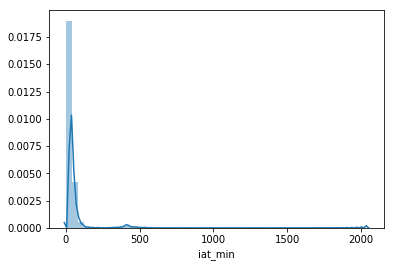

In [41]:
# Plot BOS:
warnings.filterwarnings('ignore')
iatBOS = iatBOS.dropna()
sns.distplot(iatBOS['iat_min']);

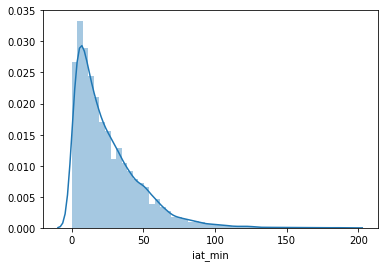

In [42]:
# BOS with less extreme values: 
warnings.filterwarnings('ignore')
iatBOSreduced = iatBOS[iatBOS['iat_min'] <= 200]
sns.distplot(iatBOSreduced['iat_min'])

In [43]:
#MCO summary:
iatMCO = MCO.sort_values(by=['arrive'])
iatMCO['iat'] = iatMCO['arrive'].diff()
iatMCO['iat_min'] =  iatMCO['iat'].dt.total_seconds()/60

iatMCO.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iat,13972,0 days 00:37:36.836530,0 days 01:14:23.796204,0 days 00:00:00,0 days 00:09:00,0 days 00:21:00,0 days 00:40:00,0 days 19:27:00
iat_min,13972,37.6139,74.3966,0,9,21,40,1167


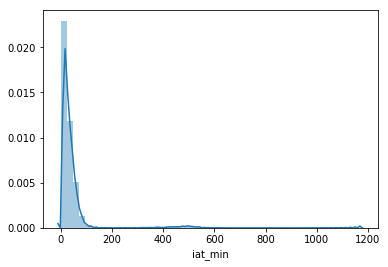

In [44]:
# Plot MCO:
warnings.filterwarnings('ignore')
iatMCO = iatMCO.dropna()
sns.distplot(iatMCO['iat_min']);

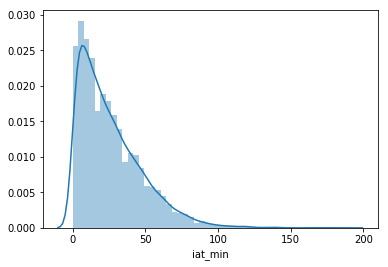

In [45]:
# MCO with less extreme values: 
warnings.filterwarnings('ignore')
iatMCOreduced = iatMCO[iatMCO['iat_min'] <= 200]
sns.distplot(iatMCOreduced['iat_min'])

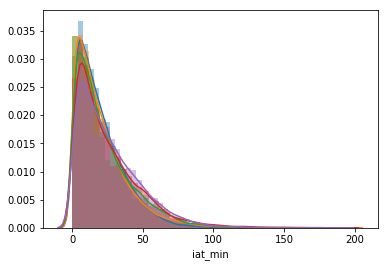

In [46]:
## Plot all in the same figure (less extreme value ones)
warnings.filterwarnings('ignore')
sns.distplot(iatATLreduced['iat_min'])
sns.distplot(iatORDreduced['iat_min'])
sns.distplot(iatLAXreduced['iat_min'])
sns.distplot(iatBOSreduced['iat_min'])
sns.distplot(iatMCOreduced['iat_min'])

(0, 0.04)

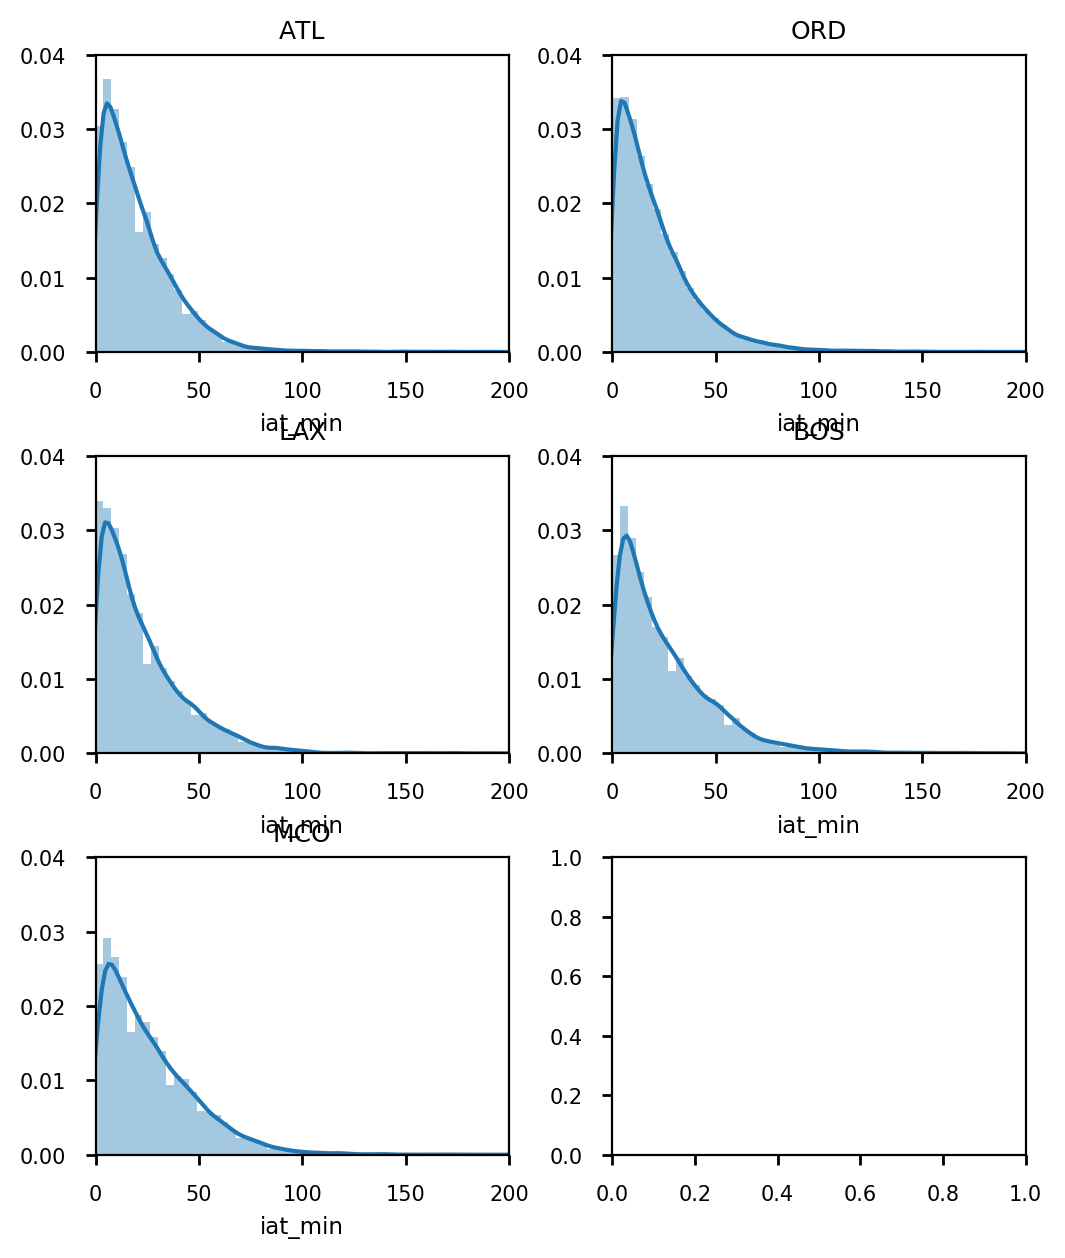

In [47]:
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 1.5})

fig, axs = plt.subplots(nrows=3,ncols=2, dpi=200)
fig.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=0.25, hspace=0.35)


sns.distplot(iatATLreduced['iat_min'], ax=axs[0,0])
axs[0,0].set(title="ATL")
axs[0,0].set_xlim([0, 200]); axs[0,0].set_ylim([0, 0.04])
sns.distplot(iatORDreduced['iat_min'], ax=axs[0,1])
axs[0,1].set(title="ORD")
axs[0,1].set_xlim([0, 200]); axs[0,1].set_ylim([0, 0.04])
sns.distplot(iatLAXreduced['iat_min'], ax=axs[1,0])
axs[1,0].set(title="LAX")
axs[1,0].set_xlim([0, 200]); axs[1,0].set_ylim([0, 0.04])
sns.distplot(iatBOSreduced['iat_min'], ax=axs[1,1]) 
axs[1,1].set(title="BOS")
axs[1,1].set_xlim([0, 200]); axs[1,1].set_ylim([0, 0.04])
sns.distplot(iatMCOreduced['iat_min'], ax=axs[2,0])
axs[2,0].set(title="MCO")
axs[2,0].set_xlim([0, 200]); axs[2,0].set_ylim([0, 0.04])
